## Лабораторная работа №2 ##

## Байесовский классификатор

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

## Генерация набора данных

In [94]:
N = 300
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([2, 2])
cloud2 = noise + np.array([-2, -2])
cloud3 = noise + np.array([-2, 2])
cloud4 = noise + np.array([2, -2])

In [95]:
data = np.vstack([cloud1, cloud2, cloud3, cloud4])

In [96]:
annotation1 = [0]*N
annotation2 = [1]*N
annotation3 = [2]*N
annotation4 = [3]*N
annotations = annotation1 + annotation2 + annotation3 + annotation4

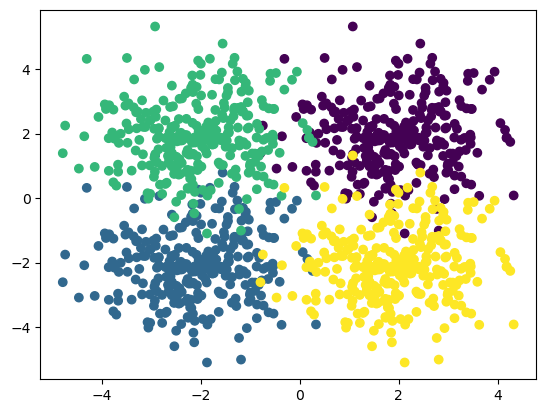

In [99]:
plt.scatter(data[:,0], data[:,1], c=annotations)

Для оценки качества модели необходимо использовать набор тестовых данных. Тестовый набор состоит из данных, который не использовались в обучении модели. Обычно тестовый набор составляет 20% от всего набора данных (значение может отличаться в зависимости от задачи и объёма данных).

In [83]:
# Перемешиваем данные
data, annotations = shuffle(data, annotations)
# Разделяем данные на обучающие и тестовые
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.2)

In [84]:
Xtrain.shape, Xtest.shape

((960, 2), (240, 2))

In [85]:
len(Ytrain), len(Ytest)

(960, 240)

## Инициализиуем классификатор

In [86]:
# Другие модели из бибилотеки имеют аналогичный интерфейс.
model = GaussianNB()

In [87]:
# Обучаем
model.fit(Xtrain, Ytrain)

GaussianNB()

In [88]:
pred = model.predict(Xtest)

In [89]:
def evaluate(P, T):
    # P - Предсказанные значение
    # T - Истинные значения
    # accuracy = correct predictions / all predictions
    accuracy = np.mean(P == T)
    print(accuracy*100, '%')

In [90]:
evaluate(pred, Ytest)

93.33333333333333 %


In [31]:
# Вычисление матрицы ошибок
# (i, j) элементы матрицы показывают число элементов класса `i` отнесённых классификатором к классу `j`
# i - строки
# j - столбцы
conf_mat = confusion_matrix(Ytest, pred)
conf_mat

array([[47,  0,  1,  3],
       [ 0, 53,  2,  2],
       [ 6,  0, 62,  0],
       [ 2,  0,  0, 62]], dtype=int64)

<AxesSubplot:>

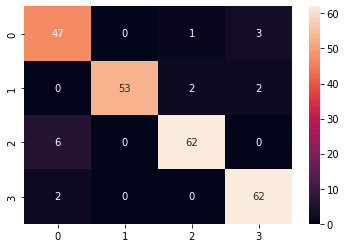

In [32]:
# Визуализация матрицы ошибок
sns.heatmap(conf_mat, annot=True)

## Метрики

Ошибка первого рода - __false positive error (FP)__, так же называют "ложная тревога", когда гипотеза принимается, хотя на самом деле она не верна.

Ошибка второго рода - __false negative error (FN)__, так же называют "пропуск цели", когда гипотеза отвергается, хотя на самом деле она верна.


__True positive (TP)__ - Верно принятые гипотезы.

__True negative (TN)__ - Верно отвергнутые гипотезы.

#### Точность (Accuracy)
$$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [33]:
accuracy_score(Ytest, pred) * 100
# совпадает с методом evaluate

93.33333333333333

### Precision, recall и f1-score

$$\large precision = \frac{TP}{TP + FP}$$

$$\large recall = \frac{TP}{TP + FN}$$

$$\large \ F = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [34]:
report = classification_report(Ytest, pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       1.00      0.93      0.96        57
           2       0.95      0.91      0.93        68
           3       0.93      0.97      0.95        64

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.94      0.93      0.93       240

